In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# full names and functions of these variables:

    age: The age of the patient.
    
    sex: The sex of the patient (1 = male, 0 = female).
    
    cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
    
    trtbps: Resting blood pressure (in mm Hg).
    
    chol: Serum cholesterol in mg/dl.
    
    fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
    
    restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
    
    thalachh: Maximum heart rate achieved.
    
    exng: Exercise induced angina (1 = yes, 0 = no).
    
    oldpeak: ST depression induced by exercise relative to rest.
    
    slp: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
    
    caa: Number of major vessels (0-3) colored by fluoroscopy.
    
    thall: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect).
    
    output: Diagnosis of heart disease (1 = presence of heart disease, 0 = absence of heart disease).

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
def summary(dataset):
    # Data shape
    print(f'Data shape: {dataset.shape}')
    
    # Initialize summary DataFrame
    summary_df = pd.DataFrame(dataset.dtypes, columns=['Data Type'])
    
    # Missing values
    summary_df['Missing'] = dataset.isnull().sum()
    summary_df['% Missing'] = (dataset.isnull().sum() / len(dataset)) * 100
    
    # Number of unique values
    summary_df['Unique'] = dataset.nunique()
    
    # Descriptive statistics (only for numeric columns)
    desc = dataset.describe(include='all').transpose()
    summary_df['Min'] = desc['min']
    summary_df['Max'] = desc['max']
       
    return summary_df


summary(df)


Data shape: (303, 14)


,Data Type,Missing,% Missing,Unique,Min,Max
age,int64,0,0.0,41,29.0,77.0
sex,int64,0,0.0,2,0.0,1.0
cp,int64,0,0.0,4,0.0,3.0
trtbps,int64,0,0.0,49,94.0,200.0
chol,int64,0,0.0,152,126.0,564.0
fbs,int64,0,0.0,2,0.0,1.0
restecg,int64,0,0.0,3,0.0,2.0
thalachh,int64,0,0.0,91,71.0,202.0
exng,int64,0,0.0,2,0.0,1.0
oldpeak,float64,0,0.0,40,0.0,6.2


In [10]:
import pandas as pd

def detect_outliers(df):
    # Initialize summary DataFrame
    summary_df = pd.DataFrame(index=df.columns, columns=['Min', 'Q1', 'Q2 (Median)', 'Q3', 'Max', 'Lower Bound', 'Upper Bound', 'Number of Outliers'])
    
    # Loop through each column
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            # Calculate basic statistics
            min_val = df[column].min()
            Q1 = df[column].quantile(0.25)
            Q2 = df[column].median()
            Q3 = df[column].quantile(0.75)
            max_val = df[column].max()
            
            # Calculate IQR
            IQR = Q3 - Q1
            
            # Calculate lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count number of outliers
            num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
            
            # Store results in summary DataFrame
            summary_df.loc[column] = [min_val, Q1, Q2, Q3, max_val, lower_bound, upper_bound, num_outliers]
        else:
            # Not numeric column, skip outlier detection
            summary_df.loc[column] = [None, None, None, None, None, None, None, None]
    
    return summary_df

detect_outliers(df)


,Min,Q1,Q2 (Median),Q3,Max,Lower Bound,Upper Bound,Number of Outliers
age,29,47.5,55.0,61.0,77,27.25,81.25,0
sex,0,0.0,1.0,1.0,1,-1.5,2.5,0
cp,0,0.0,1.0,2.0,3,-3.0,5.0,0
trtbps,94,120.0,130.0,140.0,200,90.0,170.0,9
chol,126,211.0,240.0,274.5,564,115.75,369.75,5
fbs,0,0.0,0.0,0.0,1,0.0,0.0,45
restecg,0,0.0,1.0,1.0,2,-1.5,2.5,0
thalachh,71,133.5,153.0,166.0,202,84.75,214.75,1
exng,0,0.0,0.0,1.0,1,-1.5,2.5,0
oldpeak,0.0,0.0,0.8,1.6,6.2,-2.4,4.0,5


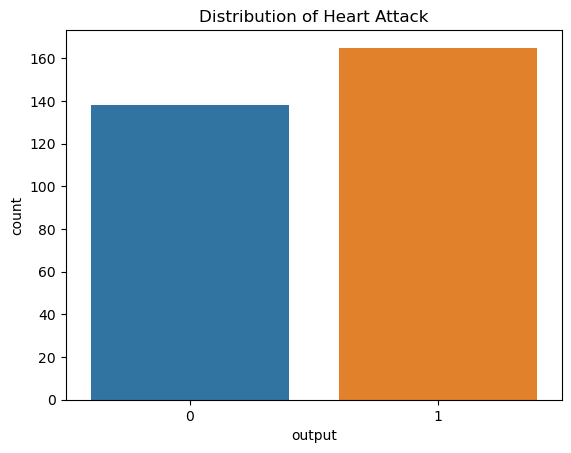

In [11]:
# Explore the distribution of the target variable
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

In [12]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

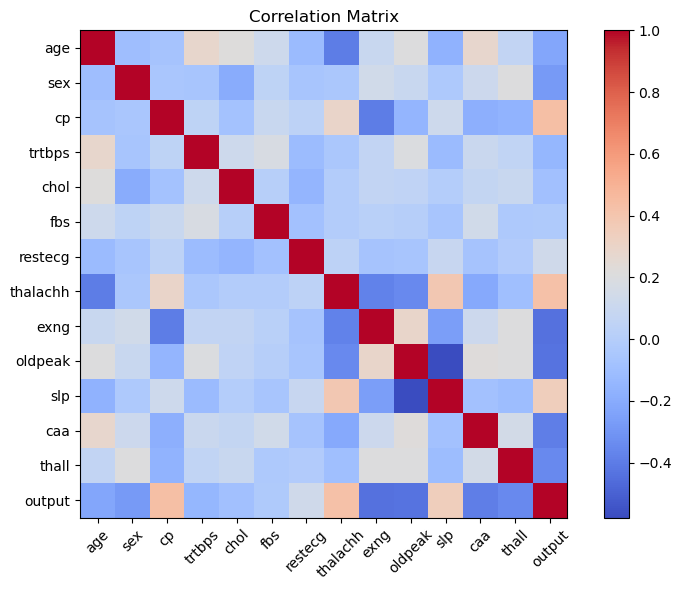

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap)

# Set axis labels and title
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
# Split the data into features (X) and target variable (y)
X = df.drop('output', axis=1)
y = df['output']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 5 27]]


The accuracy of Logistic Regression is :  85.24590163934425 %


In [18]:
model = GaussianNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]


The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


In [19]:
model = SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]


The accuracy of SVM is :  86.88524590163934 %


In [20]:
model = DecisionTreeClassifier(max_depth=6, min_samples_split=2, random_state = 12)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print ("Confusion Matrix : \n", conf)
print()
print()
print("The accuracy of Decision Tree is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]


The accuracy of Decision Tree is :  85.24590163934425 %


In [21]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print ("Confusion Matrix : \n", conf)
print()
print()
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]


The accuracy of Random Forest is :  86.88524590163934 %


In [22]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print ("Confusion Matrix : \n", conf)
print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 5 27]]


The accuracy of KNN is :  85.24590163934425 %


In [23]:
from sklearn.model_selection import GridSearchCV

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

param_grids = {
    'Decision Tree': {
        'max_depth': [None] + list(range(1, 15, 1)),
        'min_samples_split': range(2, 11, 2),
        'min_samples_leaf': range(1, 5, 1)
    },
    'Random Forest': {
        'n_estimators': range(1, 110, 2),
        'max_depth': [None] + list(range(1, 15, 1)),
        'min_samples_split': range(2, 11, 3),
        'min_samples_leaf': range(1, 5, 1)
    },
    'KNN': {
        'n_neighbors': range(3, 55, 2)
    },
    'SVM': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    }
}

# Initialize an empty list to store results
results = []

# Loop through each model and perform Grid Search with Cross-Validation
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Prediction on training data
    training_data_prediction = best_model.predict(X_train)
    
    # Prediction on testing data
    testing_data_prediction = best_model.predict(X_test)
    
    # Confusion matrix and accuracy score for testing data
    cm = confusion_matrix(y_test, testing_data_prediction)
    acc_score = accuracy_score(y_test, testing_data_prediction)
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Confusion Matrix': cm,
        'Accuracy Score': acc_score
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 9900 candidates, totalling 49500 fits
Fitting 5 folds for each of 26 candidates, totalling 130 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


,Model,Best Parameters,Confusion Matrix,Accuracy Score
0,Decision Tree,"{'max_depth': 6, 'min_samples_leaf': 2, 'min_s...","[[28, 1], [8, 24]]",0.852459
1,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...","[[25, 4], [6, 26]]",0.836066
2,KNN,{'n_neighbors': 21},"[[25, 4], [3, 29]]",0.885246
3,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}","[[26, 3], [5, 27]]",0.868852


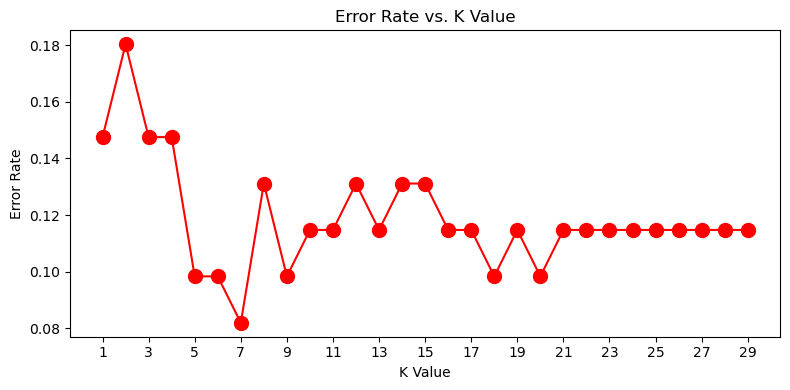

In [25]:
# Calculate error rate for different k values
error_rate = []

for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 30), error_rate, marker='o', linestyle='-', color='red', markersize=10)

# Add labels and title
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 30, step=2))  # Adjust x-axis ticks if needed
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[27  2]
 [ 3 29]]


The accuracy of KNN is :  91.80327868852459 %
